In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
jobs = pd.read_csv("jobs.csv", index_col = False)

In [3]:
jobs.head()

,Unnamed: 0,title,company_name,location,via,description,extensions,job_id,thumbnail,posted_at,...,commute_time,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens
0,0,Data Analyst,Applicantz,Anywhere,via LinkedIn,Open to work on W2 or on Corp-to-Corp (for vis...,"['41 minutes ago', 'Work from home', 'Contract...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,41 minutes ago,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['power_bi', 'qlik', 'power_bi']"
1,1,Data Analyst I (Remote Optional),Talentify.io,Anywhere,via LinkedIn,Talentify helps candidates around the world to...,"['15 hours ago', 'Work from home', 'Full-time']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgSSAoUmVtb3...,https://encrypted-tbn0.gstatic.com/images?q=tb...,15 hours ago,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['excel']
2,2,Data Analyst II,EDWARD JONES,"Whiteman AFB, MO",via Monster,"At Edward Jones, we help clients achieve their...","['24 hours ago', 'Full-time', 'Health insurance']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgSUkiLCJodG...,https://encrypted-tbn0.gstatic.com/images?q=tb...,24 hours ago,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['snowflake', 'power_bi', 'r', 'python', 'exce..."
3,3,Data Analyst,Rose International,United States,via Indeed,Position Title\nPosition Number\nLocation...\n...,['7 hours ago'],eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,NaN,7 hours ago,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['tableau', 'word', 'excel', 'sql', 'cognos']"
4,4,"Senior Data Analyst [Remote or San Diego, CA]",EDF Renewables North America,Anywhere,via LinkedIn,Scope of Position\n\nThe Pre-Construction Esti...,"['21 hours ago', 'Work from home', 'Full-time']",eyJqb2JfdGl0bGUiOiJTZW5pb3IgRGF0YSBBbmFseXN0IF...,https://encrypted-tbn0.gstatic.com/images?q=tb...,21 hours ago,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['numpy', 'mysql', 'outlook', 'tableau', 'powe..."


In [4]:
jobs.drop(columns = ['Unnamed: 0'], inplace = True)
jobs.head(1)

,title,company_name,location,via,description,extensions,job_id,thumbnail,posted_at,schedule_type,...,commute_time,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens
0,Data Analyst,Applicantz,Anywhere,via LinkedIn,Open to work on W2 or on Corp-to-Corp (for vis...,"['41 minutes ago', 'Work from home', 'Contract...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,41 minutes ago,Contractor,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['power_bi', 'qlik', 'power_bi']"


In [5]:
jobs.columns

Index(['title', 'company_name', 'location', 'via', 'description', 'extensions',
       'job_id', 'thumbnail', 'posted_at', 'schedule_type', 'work_from_home',
       'salary', 'search_term', 'date_time', 'search_location', 'commute_time',
       'salary_pay', 'salary_rate', 'salary_avg', 'salary_min', 'salary_max',
       'salary_hourly', 'salary_yearly', 'salary_standardized',
       'description_tokens'],
      dtype='object')

In [6]:
# not entirely relevant
jobs.drop(columns = ['job_id', 'thumbnail'], inplace = True)

In [7]:
## check nulls
features_with_na = [features for features in jobs.columns if jobs[features].isnull().sum() > 0]

for feature in features_with_na: 
    print(feature, np.round(jobs[feature].isnull().mean(), 4) * 100, '% missing values')
    print(features_with_na)

location 0.1 % missing values
['location', 'schedule_type', 'work_from_home', 'salary', 'commute_time', 'salary_pay', 'salary_rate', 'salary_avg', 'salary_min', 'salary_max', 'salary_hourly', 'salary_yearly', 'salary_standardized']
schedule_type 0.36 % missing values
['location', 'schedule_type', 'work_from_home', 'salary', 'commute_time', 'salary_pay', 'salary_rate', 'salary_avg', 'salary_min', 'salary_max', 'salary_hourly', 'salary_yearly', 'salary_standardized']
work_from_home 53.28000000000001 % missing values
['location', 'schedule_type', 'work_from_home', 'salary', 'commute_time', 'salary_pay', 'salary_rate', 'salary_avg', 'salary_min', 'salary_max', 'salary_hourly', 'salary_yearly', 'salary_standardized']
salary 79.97 % missing values
['location', 'schedule_type', 'work_from_home', 'salary', 'commute_time', 'salary_pay', 'salary_rate', 'salary_avg', 'salary_min', 'salary_max', 'salary_hourly', 'salary_yearly', 'salary_standardized']
commute_time 100.0 % missing values
['location

In [8]:
rm = features_with_na
rm.pop(0)
rm.pop(0)
rm

['work_from_home',
 'salary',
 'commute_time',
 'salary_pay',
 'salary_rate',
 'salary_avg',
 'salary_min',
 'salary_max',
 'salary_hourly',
 'salary_yearly',
 'salary_standardized']

In [9]:
## commute time can be dropped as its 100% nulls
print(jobs.shape)
df = jobs.drop(columns = rm)
print(df.shape)

(11059, 23)
(11059, 12)


In [10]:
df.head()

,title,company_name,location,via,description,extensions,posted_at,schedule_type,search_term,date_time,search_location,description_tokens
0,Data Analyst,Applicantz,Anywhere,via LinkedIn,Open to work on W2 or on Corp-to-Corp (for vis...,"['41 minutes ago', 'Work from home', 'Contract...",41 minutes ago,Contractor,data analyst,00:07.7,United States,"['power_bi', 'qlik', 'power_bi']"
1,Data Analyst I (Remote Optional),Talentify.io,Anywhere,via LinkedIn,Talentify helps candidates around the world to...,"['15 hours ago', 'Work from home', 'Full-time']",15 hours ago,Full-time,data analyst,00:07.7,United States,['excel']
2,Data Analyst II,EDWARD JONES,"Whiteman AFB, MO",via Monster,"At Edward Jones, we help clients achieve their...","['24 hours ago', 'Full-time', 'Health insurance']",24 hours ago,Full-time,data analyst,00:07.7,United States,"['snowflake', 'power_bi', 'r', 'python', 'exce..."
3,Data Analyst,Rose International,United States,via Indeed,Position Title\nPosition Number\nLocation...\n...,['7 hours ago'],7 hours ago,NaN,data analyst,00:07.7,United States,"['tableau', 'word', 'excel', 'sql', 'cognos']"
4,"Senior Data Analyst [Remote or San Diego, CA]",EDF Renewables North America,Anywhere,via LinkedIn,Scope of Position\n\nThe Pre-Construction Esti...,"['21 hours ago', 'Work from home', 'Full-time']",21 hours ago,Full-time,data analyst,00:07.7,United States,"['numpy', 'mysql', 'outlook', 'tableau', 'powe..."


In [11]:
df['title'].value_counts().head(20)

Data Analyst                                   1202
Senior Data Analyst                             420
Lead Data Analyst                               241
Sr. Data Analyst, Marketing Operations          203
Data Analyst II                                 203
Business Data Analyst                           139
Data Scientist                                   99
Senior Data Analyst, Business Optimization       99
Junior Data Analyst                              62
Senior Performance Marketing (Data Analyst)      59
Business Intelligence Analyst                    59
Marketing Data Analyst                           59
Sr. Data Analyst                                 56
Data Analyst III                                 48
Data analyst                                     44
Lead-Data Analyst                                43
Data Engineer                                    41
Data Analyst I                                   40
Data Analyst IV (Healthcare Analytics)           37
Principal Da

### Keyword Extraction

In [12]:
text = df['description'][1]
text

"Talentify helps candidates around the world to discover and stay focused on the jobs they want until they can complete a full application in the hiring company career page/ATS.\n\nAbout PanCAN...\n\nPancreatic cancer doesn’t stop or slow down, and neither do we. At PanCAN, we accelerate critical progress for pancreatic cancer patients. We take bold action by funding life-saving research, providing personalized patient services free of charge, and creating a community of supporters and volunteers who will stop at nothing to create a world in which all pancreatic cancer patients thrive.\n\nPanCAN’s Precision Promise (SM) is one example of how we work to change the future for pancreatic cancer patients. Precision Promise is our groundbreaking clinical trial platform that is now enrolling patients at top institutions nationwide. Precision Promise is what the pancreatic cancer field and our patient community have been waiting for, hailed for its ability to transform the way clinical resear

In [13]:
from rake_nltk import Rake
rake_nltk_var = Rake()
rake_nltk_var.extract_keywords_from_text(text)
keyword_extracted = rake_nltk_var.get_ranked_phrases()
print(keyword_extracted)

['• manage various report requests utilizing', 'queries using various reporting tools within', 'esssential functions • generate recurring', 'providing personalized patient services free', '“ spiceworks .” • collaborate', '• review existing automated reports', 'talentify helps candidates around', 'help desk ticket system', 'changes lives every day', 'providing accurate information based', 'groundbreaking clinical trial platform', 'hiring company career page', '• minimum 2 years', '• support business partners', 'pancreatic cancer patients thrive', 'pancan ... pancreatic cancer', '• perform additional duties', 'maintain report process documentation', 'frequently used queries', 'improve existing reports', 'pancreatic cancer patients', 'pancreatic cancer patients', 'pancreatic cancer field', '• advanced skills', 'way clinical research', 'top institutions nationwide', 'microsoft excel required', 'identify end users', 'exceptional organizational skills', 'continuously identify opportunities',

In [14]:
import yake
kw_extractor = yake.KeywordExtractor()
language = "en"
max_ngram_size = 3
deduplication_threshold = 0.9
numOfKeywords = 10
custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=numOfKeywords, features=None)
keywords = custom_kw_extractor.extract_keywords(text)
for kw in keywords:
    print(kw)

('company career page', 0.008765607085628515)
('pancreatic cancer patients', 0.011063860518743146)
('Pancreatic cancer', 0.017942875084172777)
('Precision Promise', 0.0315651096442336)
('hiring company career', 0.03180011342821025)
('cancer patients', 0.032947099025186756)
('Talentify helps candidates', 0.040580147215082595)
('career page', 0.040580147215082595)
('Data', 0.04171660280513746)
('discover and stay', 0.042380939206690296)


In [15]:
"""
import spacy
import re
import string
### takes long time to run
nlp = spacy.load("en_core_web_sm")
out = []
vals = list(df['description'])
for j in range(len(vals)):
    doc = nlp(vals[j])
    l = doc.ents
    l = list(l)
    row = []
    for i in range(len(l)):
        stt = str(l[i].text)
        l[i] = re.sub('[^A-Za-z0-9" "]+', '', stt)
        row.append(l[i])
    out.append(row)
"""

'\nimport spacy\nimport re\nimport string\n### takes long time to run\nnlp = spacy.load("en_core_web_sm")\nout = []\nvals = list(df[\'description\'])\nfor j in range(len(vals)):\n    doc = nlp(vals[j])\n    l = doc.ents\n    l = list(l)\n    row = []\n    for i in range(len(l)):\n        stt = str(l[i].text)\n        l[i] = re.sub(\'[^A-Za-z0-9" "]+\', \'\', stt)\n        row.append(l[i])\n    out.append(row)\n'

In [16]:
#df['keywords'] = out

In [17]:
df = pd.read_csv("jobs-keywords.csv")

In [18]:
df.drop(columns = ['Unnamed: 0'], inplace = True)
df.head(1)

,title,company_name,location,via,description,extensions,posted_at,schedule_type,search_term,date_time,search_location,description_tokens,keywords
0,Data Analyst,Applicantz,Anywhere,via LinkedIn,Open to work on W2 or on Corp-to-Corp (for vis...,"['41 minutes ago', 'Work from home', 'Contract...",41 minutes ago,Contractor,data analyst,00:07.7,United States,"['power_bi', 'qlik', 'power_bi']","['W2', 'ONE', 'Power BI', '35 years', 'Skills ..."


In [19]:
#df.to_csv('jobs-keywords.csv')

In [20]:
df['keywords'][0]

"['W2', 'ONE', 'Power BI', '35 years', 'Skills Strong', ' Adept', ' Proven', ' Knowledge', 'Qlik', ' Problem', ' Accuracy', ' Team', 'Roles and Responsibilities', ' Create', ' Collaborate', ' Use', ' Create']"

In [21]:
import re
for i in range(len(df['keywords'])):
    df['keywords'][i] = re.sub('[^A-Za-z0-9" "]+', '', df['keywords'][i])
df['keywords'][0]

'W2 ONE Power BI 35 years Skills Strong  Adept  Proven  Knowledge Qlik  Problem  Accuracy  Team Roles and Responsibilities  Create  Collaborate  Use  Create'

In [22]:
df['keywords'][0]

'W2 ONE Power BI 35 years Skills Strong  Adept  Proven  Knowledge Qlik  Problem  Accuracy  Team Roles and Responsibilities  Create  Collaborate  Use  Create'

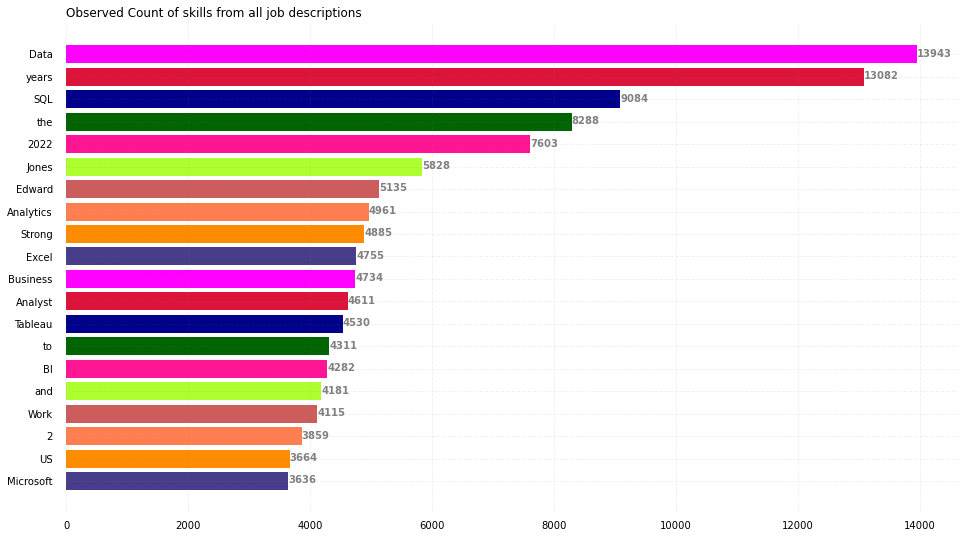

In [30]:
frequency = {}
import matplotlib.pyplot as plt
keysss = df['keywords']
for i in range(len(keysss)):
    wrds = keysss[i].split()
    for word in wrds:
        count = frequency.get(word,0)
        frequency[word] = count + 1
    
frequency_list = frequency.keys()
#for words in frequency_list:
#    print(words, frequency[words])



list = frequency

df33 = pd.DataFrame([list])

df1 = pd.melt(df33)


df1.columns = [
    'Skill',
    'Count',
]

df1 = df1.sort_values(by = ['Count'],ascending=False)

df_plot = df1.head(20)


Count = df_plot['Count']
Skill = df_plot['Skill']
fig, ax = plt.subplots(figsize = (16, 9))
ax.barh(Skill, Count,color = ["#ff00ff","#dc143c","#00008b","#006400","#ff1493", "#adff2f","#cd5c5c","#ff7f50", "#ff8c00", "#483d8b"])
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
# Add Plot Title
ax.set_title('Observed keywords using SpaCy from all job descriptions',
             loc = 'left', )
plt.show()

In [24]:
df1

,Skill,Count
32,Data,13943
5,years,13082
78,SQL,9084
31,the,8288
102,2022,7603
...,...,...
14392,Conversational,1
14394,ERS1,1
14395,ALOS,1
14396,PALSAR,1
